## Trabalho de Resistência dos Materiais II

Tema: Deflexão em uma viga em balanço

---

In [1]:
from sympy import *
from sympy.physics.continuum_mechanics import Beam
import numpy as np

In [2]:
R0,RL,P,x = symbols('R_0 R_L P x')
L,E,I = symbols('L E I ', positive = True)

In [3]:
#Criando o elemento viga
viga = Beam(L,E,I)

In [4]:
#Aplicando uma carga genérica na extrimidade da viga
viga.apply_load(P,L,-1)

In [5]:
#Definindo o suporte fixo da viga
viga.apply_support(0, type='fixed')

C:\Users\abner\anaconda3\lib\site-packages\sympy\plotting\plot.py:1376: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(**a)


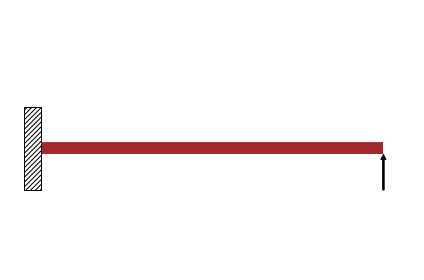

In [6]:
viga.draw().show();

In [7]:
#Escrevendo a função do carregamento
viga.load

M_0*SingularityFunction(x, 0, -2) + P*SingularityFunction(x, L, -1) + R_0*SingularityFunction(x, 0, -1)

In [8]:
M0,R0 = symbols('M_0 R_0')

In [9]:
#Encontrando as reações nos apoios
viga.solve_for_reaction_loads(M0,R0)

In [10]:
viga.reaction_loads;

In [11]:
viga.reaction_loads[M0] #momento

L*P

In [12]:
viga.reaction_loads[R0] #força de reação

-P

In [13]:
#Reescrevendo a equação de carregamento após ter descoberto o valor das reações nos apoios
viga.load

L*P*SingularityFunction(x, 0, -2) - P*SingularityFunction(x, 0, -1) + P*SingularityFunction(x, L, -1)

In [14]:
#Equação do cisalhamento
viga.shear_force()

-L*P*SingularityFunction(x, 0, -1) + P*SingularityFunction(x, 0, 0) - P*SingularityFunction(x, L, 0)

In [15]:
#escrevendo equação do momento
viga.bending_moment()

-L*P*SingularityFunction(x, 0, 0) + P*SingularityFunction(x, 0, 1) - P*SingularityFunction(x, L, 1)

In [16]:
# Escrevendo equação da inclinação
viga.slope()

-(-L*P*SingularityFunction(x, 0, 1) + P*SingularityFunction(x, 0, 2)/2 - P*SingularityFunction(x, L, 2)/2)/(E*I)

In [17]:
# Escrevendo equação da deflexão
viga.deflection()

-(-L*P*SingularityFunction(x, 0, 2)/2 + P*SingularityFunction(x, 0, 3)/6 - P*SingularityFunction(x, L, 3)/6)/(E*I)

In [51]:
# Calculando a deflexão no ponto de aplicação da força
deflexao = viga.deflection().subs('x',L)
deflexao

L**3*P/(3*E*I)

#### Calculando o momento de inércia da viga

Dados geométricos: </br>

L = 1120 mm; </br> 
D = 20 mm; </br>
d = 16.64 mm

In [19]:
D,d,i= symbols('D d i')

In [20]:
i = ((np.pi*((D**4)-(d**4)))/64)*10**12 #fórmula do momento de inércia

In [21]:
dic1 = {D:0.02,d:0.01664} #Passando as dimenções dos diãmetros externo e interno

In [22]:
i = i.subs(dic1)
print(f'O momento de inércia do cano é {i} mm^4.')

O momento de inércia do cano é 4090.55731875131 mm^4.


#### Calculando o módulo de elasticidade

In [23]:
# Definindo uma variável para a deflexão Máxima
y = symbols('y')

In [24]:
#Escrevendo uma igualdade para a deflexão da viga
eq_y = Eq(y, deflexao)
eq_y

Eq(y, L**3*P/(3*E*I))

In [52]:
# Biblioteca utilizadas pra importar os dados do excel
from pandas import *
import pandas as pd

In [26]:
dados = pd.read_excel('dados.xlsx')
dados

,Peso (N),Deflexão (mm)
0,0.00000,0
1,0.09807,3
2,0.19610,5
3,0.29420,9
4,0.39230,11
5,0.49030,14
6,0.58840,17
7,0.68650,19


In [27]:
eixo_x = dados['Peso (N)'].values

In [28]:
eixo_y = dados['Deflexão (mm)'].values

In [29]:
ex = np.ravel(eixo_x)
ey = np.ravel(eixo_y)

In [31]:
coef = np.polyfit (ex,ey,1)

In [32]:
k = coef[0] #Determinando o coeficiente angular da reta de regressão, que melhor se adequa aos pontos obtidos no experimento (esse coeficiente angular equivale ao coeficiente de rigidez, k, do tubo, k é dado em N/mm)

In [44]:
eq = f'{k}x'
print(f'A equação fica F = {eq}.')

A equação fica F = 28.162685142980088x.


In [30]:
import matplotlib.pyplot as plt

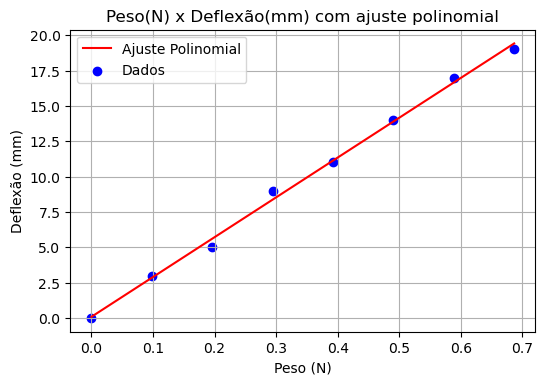

In [49]:
plt.figure(dpi=100)
plt.scatter(ex, ey, color='blue', label='Dados')
plt.plot(ex, np.polyval(coef, ex), color='red', label='Ajuste Polinomial')
plt.legend()
plt.xlabel('Peso (N)')
plt.ylabel('Deflexão (mm)')
plt.title('Peso(N) x Deflexão(mm) com ajuste polinomial')
plt.grid()
plt.show()

In [35]:
K = symbols('K')

In [36]:
eq_e = L**3/(3*K*I)

In [37]:
# Determinando o módulo de elasticidade a partr do K encontrado
eq_E = Eq(E, eq_e)
eq_E

Eq(E, L**3/(3*I*K))

In [38]:
dicf = {L:1120, K:k, I:i}

In [40]:
print(f'O o módulo de elasticidade E é {eq_e.subs(dicf)} MPa.')

O o módulo de elasticidade E é 4065.14715110010 MPa.
